In [1]:
import os
os.environ['USE_PYGEOS'] = '0' # only if you have pygeos

import geopandas as gpd
from  fiona import listlayers


In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium

In [4]:
pip install folium matplotlib mapclassify

Note: you may need to restart the kernel to use updated packages.


In [6]:
france=gpd.read_file(os.path.join("maps","FRA_adm","FRA_adm0.shp"))

<Axes: >

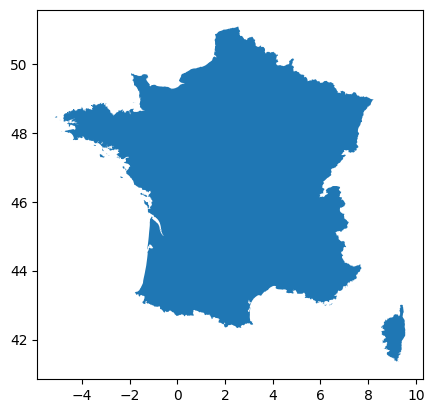

In [7]:
# plot simple

france.plot()

In [8]:
#EJERCICIO 1
#sale que tiene longitud y latitud por tanto no es proyectada
france.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [9]:
# centroid (NO REAL PORQUE ES NO PROYECTADO)
france.centroid

C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_21068\4182186700.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france.centroid


0    POINT (2.55355 46.55891)
dtype: geometry

In [10]:
#tiene que salir (meters)
france.to_crs(27561).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [11]:
#ya no sale error en el centroide
france.to_crs(27561).centroid

0    POINT (618746.101 -133293.938)
dtype: geometry

<Axes: >

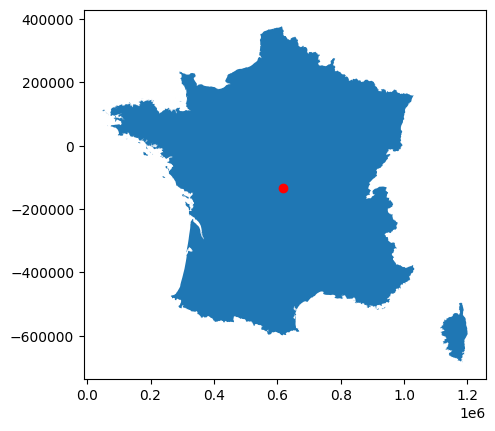

In [12]:
#se vuelve a graficar
base27561=france.to_crs(27561).plot()
france.to_crs(27561).centroid.plot(color='red',ax=base27561)

C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_21068\3481463078.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france.centroid.plot(color='red',ax=ax2)


<Axes: title={'center': 'unprojected'}>

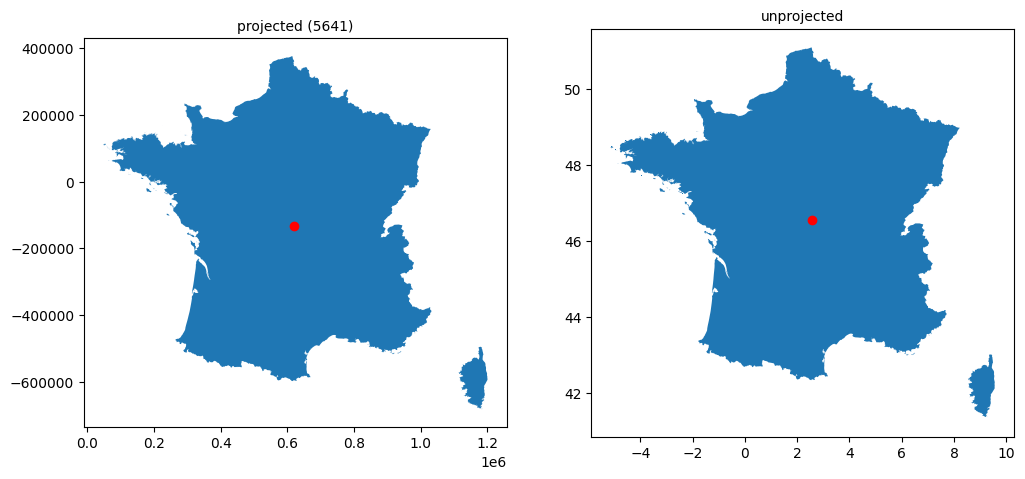

In [13]:
#se compara el no proyectado y el proyectado
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (5641)',fontsize=10)
france.to_crs(27561).plot(ax=ax1)
france.to_crs(27561).centroid.plot(color='red',ax=ax1)

ax2.set_title('unprojected',fontsize=10)
france.plot(ax=ax2)
france.centroid.plot(color='red',ax=ax2)

In [14]:
france_27561=france.to_crs(27561)

In [15]:
# saving 
import os

france_27561.to_file(os.path.join("maps","franceMaps_27561.gpkg"), layer='pais', driver="GPKG")

In [16]:
#EJERCICIO 2
#sale que es multipoligono
france_27561

,ID_0,ISO,NAME_0,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,79,FRA,France,78,FRA,France,FRANCE,France,France,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((1183926.937 -681896.573, 11839..."


In [17]:
#queremos los bordes
france_27561.boundary

0    MULTILINESTRING ((1183926.937 -681896.573, 118...
dtype: geometry

<Axes: >

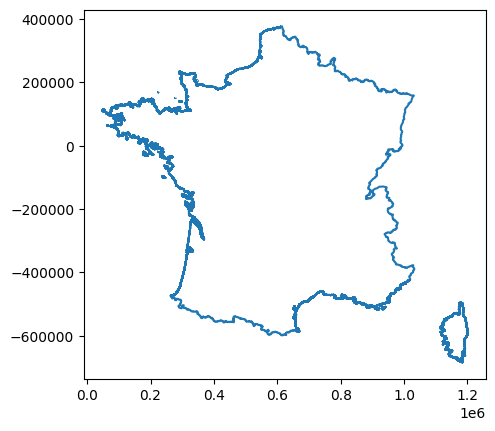

In [18]:
#ahora dibujamos las lineas
france_27561.boundary.plot()

In [19]:
# does 'boundary' return a GDF? NO
type(france_27561.boundary)

geopandas.geoseries.GeoSeries

In [20]:
#Se convierte en GDF
france_27561.boundary.to_frame()

,0
0,"MULTILINESTRING ((1183926.937 -681896.573, 118..."


In [21]:
#se convierte
france_27561DF=france_27561.boundary.to_frame() 

# nueva columna (optional)
france_27561DF['name']='france' 

# se renombra la columna
france_27561DF.rename(columns={0:'geometryF'},inplace=True) 

#se configura ya que el nombre no es sufi
france_27561DF = france_27561DF.set_geometry("geometryF")

#verificacion
france_27561DF.crs

<Projected CRS: EPSG:27561>
Name: NTF (Paris) / Lambert Nord France
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France mainland onshore north of 53.5 grads North (48°09'N).
- bounds: (-4.87, 48.14, 8.23, 51.14)
Coordinate Operation:
- name: Lambert Nord France
- method: Lambert Conic Conformal (1SP)
Datum: Nouvelle Triangulation Francaise (Paris)
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Paris

In [22]:
france_27561DF.to_file(os.path.join("maps","franceMaps_27561.gpkg"), layer='borde', driver="GPKG")

In [23]:
#EJERCICIO 3
france_regiones=gpd.read_file(os.path.join("maps","FRA_adm","FRA_adm1.shp"))
france_departamento=gpd.read_file(os.path.join("maps","FRA_adm","FRA_adm2.shp"))

In [24]:
#quiero saber que info estoy descargando
france_regiones.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,79,FRA,France,1,Alsace,Région,Region,NaN,Alsacia|Elsaß,"POLYGON ((7.11506 49.07059, 7.11331 49.06475, ..."
1,79,FRA,France,2,Aquitaine,Région,Region,NaN,NaN,"MULTIPOLYGON (((-1.17597 44.70486, -1.17597 44..."
2,79,FRA,France,3,Auvergne,Région,Region,NaN,NaN,"POLYGON ((2.97990 46.80342, 2.99660 46.79696, ..."
3,79,FRA,France,4,Île-de-France,Région,Region,NaN,NaN,"POLYGON ((1.74269 49.17980, 1.75613 49.17488, ..."
4,79,FRA,France,5,Basse-Normandie,Région,Region,NaN,Baja Normandía|Lower Normandy,"MULTIPOLYGON (((-1.51430 48.66097, -1.51430 48..."


In [25]:
france_departamento.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,79,FRA,France,1,Alsace,1,Bas-Rhin,Département,Department,NaN,Unterelsaá,"POLYGON ((7.11506 49.07059, 7.11331 49.06475, ..."
1,79,FRA,France,1,Alsace,2,Haut-Rhin,Département,Department,NaN,Oberelsaá,"POLYGON ((7.21836 48.31089, 7.24524 48.30334, ..."
2,79,FRA,France,2,Aquitaine,3,Dordogne,Département,Department,NaN,NaN,"POLYGON ((0.65029 45.69759, 0.65361 45.69103, ..."
3,79,FRA,France,2,Aquitaine,4,Gironde,Département,Department,NaN,Bec-D'Ambes,"MULTIPOLYGON (((-1.17597 44.70486, -1.17597 44..."
4,79,FRA,France,2,Aquitaine,5,Landes,Département,Department,NaN,Landas,"POLYGON ((-1.08517 44.53220, -1.03002 44.50858..."


In [26]:
#se ve que tengan los CRS
france_regiones.crs, france_departamento.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

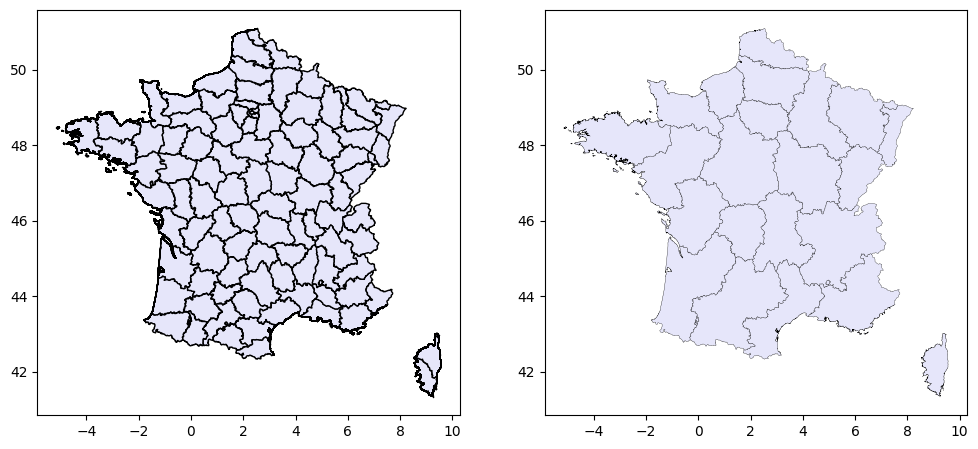

In [27]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

france_departamento.plot(ax=ax1, facecolor='lavender', edgecolor='black')
france_regiones.plot(ax=ax2, facecolor='lavender', edgecolor='black',linewidth=0.2)

In [28]:
france_departamento.to_crs(27561)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,79,FRA,France,1,Alsace,1,Bas-Rhin,Département,Department,NaN,Unterelsaá,"POLYGON ((948896.467 163320.016, 948809.857 16..."
1,79,FRA,France,1,Alsace,2,Haut-Rhin,Département,Department,NaN,Oberelsaá,"POLYGON ((961897.136 79499.922, 963941.461 787..."
2,79,FRA,France,2,Aquitaine,3,Dordogne,Département,Department,NaN,NaN,"POLYGON ((468412.004 -221535.010, 468654.108 -..."
3,79,FRA,France,2,Aquitaine,4,Gironde,Département,Department,NaN,Bec-D'Ambes,"MULTIPOLYGON (((320818.667 -327115.274, 320817..."
4,79,FRA,France,2,Aquitaine,5,Landes,Département,Department,NaN,Landas,"POLYGON ((327156.858 -346680.063, 331433.365 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...
91,79,FRA,France,22,Rhône-Alpes,92,Haute-Savoie,Département,Department,NaN,NaN,"POLYGON ((933990.102 -128837.399, 934193.786 -..."
92,79,FRA,France,22,Rhône-Alpes,93,Isère,Département,Department,NaN,NaN,"POLYGON ((843350.409 -208976.089, 845303.770 -..."
93,79,FRA,France,22,Rhône-Alpes,94,Loire,Département,Department,NaN,NaN,"POLYGON ((720966.869 -157571.520, 721382.692 -..."
94,79,FRA,France,22,Rhône-Alpes,95,Rhône,Département,Department,NaN,NaN,"POLYGON ((781801.713 -152834.079, 781863.355 -..."


In [29]:
france_departamento.geometry

0     POLYGON ((7.11506 49.07059, 7.11331 49.06475, ...
1     POLYGON ((7.21836 48.31089, 7.24524 48.30334, ...
2     POLYGON ((0.65029 45.69759, 0.65361 45.69103, ...
3     MULTIPOLYGON (((-1.17597 44.70486, -1.17597 44...
4     POLYGON ((-1.08517 44.53220, -1.03002 44.50858...
                            ...                        
91    POLYGON ((6.68098 46.45695, 6.68360 46.45664, ...
92    POLYGON ((5.46040 45.77831, 5.48400 45.75328, ...
93    POLYGON ((3.90377 46.27401, 3.90876 46.26062, ...
94    POLYGON ((4.69344 46.30233, 4.69388 46.29454, ...
95    POLYGON ((5.90471 45.81182, 5.91395 45.80406, ...
Name: geometry, Length: 96, dtype: geometry

In [30]:
france_departamento.crs = "EPSG:4326"
france_regiones.crs = "EPSG:4326"

In [31]:
#y luego se reproyecta
france_departamento_27561=france_departamento.to_crs(27561)
france_regiones_27561=france_regiones.to_crs(27561)

In [32]:
#se guarda
france_departamento_27561.to_file(os.path.join("maps","franceMaps_27561.gpkg"), layer='departamento', driver="GPKG")
france_regiones_27561.to_file(os.path.join("maps","franceMaps_27561.gpkg"), layer='regiones', driver="GPKG")

C:\Users\HP SUPPORT\.conda\envs\prueba1\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\HP SUPPORT\.conda\envs\prueba1\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


<Axes: title={'center': 'Below_Centroid'}>

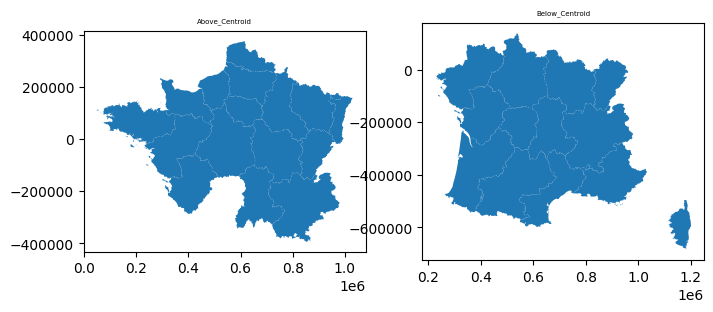

In [53]:
#EJERCICIO 4
centrofrance=france_27561.centroid

fig, axs = pyplot.subplots(ncols=2,sharex=False, sharey=False,figsize=(8,8))

axs[0].set_title('Above_Centroid',fontsize=5)
france_regiones_27561.cx[:,centrofrance.y:].plot(ax=axs[0]) 

axs[1].set_title('Below_Centroid',fontsize=5)
france_regiones_27561.cx[:,:centrofrance.y].plot(ax=axs[1]) 

In [57]:
# you create
france_Up=france_regiones_27561.cx[:,centrofrance.y:].dissolve()
# you get
france_Up

C:\Users\HP SUPPORT\.conda\envs\prueba1\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


,geometry,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1
0,"MULTIPOLYGON (((99479.467 32305.919, 99482.212...",79,FRA,France,1,Alsace,Région,Region,NaN,Alsacia|Elsaß


<Axes: >

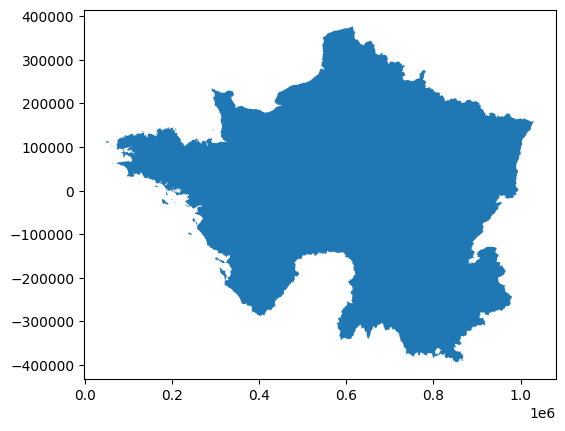

In [58]:
france_Up.plot()

In [59]:
rowsCX=(france_regiones_27561.cx[:centrofrance.x,centrofrance.y:].shape[0],\
france_regiones_27561.cx[centrofrance.x:,centrofrance.y:].shape[0],\
france_regiones_27561.cx[:centrofrance.x,:centrofrance.y].shape[0],\
france_regiones_27561.cx[centrofrance.x:,:centrofrance.y].shape[0])
sum(rowsCX)

C:\Users\HP SUPPORT\.conda\envs\prueba1\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\HP SUPPORT\.conda\envs\prueba1\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\HP SUPPORT\.conda\envs\prueba1\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\HP SUPPORT\.conda\envs\prueba1\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use fl

38

In [60]:
sum(rowsCX)-france_regiones_27561.shape[0]

16

In [36]:
#EJERCICIO 5
#se utiliza la data de los aeropuertos de francia 
import pandas as pd 
infoairports=pd.read_csv(os.path.join("maps","fr-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,4185,LFPG,large_airport,Charles de Gaulle International Airport,49.012798,2.55,392,EU,France,FR,...,Paris,1,LFPG,CDG,NaN,http://www.aeroportsdeparis.fr/,https://en.wikipedia.org/wiki/Charles_de_Gaull...,"PAR, Aéroport Roissy-Charles de Gaulle, Roissy...",1127475,2018-09-15T03:23:45+00:00
2,4189,LFPO,large_airport,Paris-Orly Airport,48.72333,2.37944,291,EU,France,FR,...,Paris,1,LFPO,ORY,NaN,NaN,https://en.wikipedia.org/wiki/Orly_Airport,NaN,1032775,2022-12-10T05:05:41+00:00
3,4156,LFMN,large_airport,Nice-Côte d'Azur Airport,43.658401,7.21587,12,EU,France,FR,...,Nice,1,LFMN,NCE,NaN,https://www.nice.aeroport.fr/en,https://en.wikipedia.org/wiki/C%C3%B4te_d'Azur...,NaN,51475,2022-11-08T16:07:59+00:00
990,43412,FR-0072,heliport,Hôtellerie La Briquetterie Heliport,49.025001525878906,3.9069440364837646,328,EU,France,FR,...,Vinay,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2009-03-14T19:27:27+00:00
991,43406,FR-0066,heliport,Centre Hospitalier Heliport,48.71666717529297,4.6019439697265625,359,EU,France,FR,...,Vitry-Le-Francois,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2009-03-14T19:27:15+00:00
992,43571,FR-0231,heliport,Hôtel Georges Blanc Heliport,46.22083282470703,4.988889217376709,653,EU,France,FR,...,Vonnas,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2009-03-14T19:33:27+00:00
993,320617,FR-0345,closed,Vouziers-Séchault Air Base,49.2768694,4.7554409,NaN,EU,France,FR,...,Vouziers,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2016-10-02T09:14:53+00:00


In [37]:
#se elimina la primera fila
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,4185,LFPG,large_airport,Charles de Gaulle International Airport,49.012798,2.55,392,EU,France,FR,...,Paris,1,LFPG,CDG,NaN,http://www.aeroportsdeparis.fr/,https://en.wikipedia.org/wiki/Charles_de_Gaull...,"PAR, Aéroport Roissy-Charles de Gaulle, Roissy...",1127475,2018-09-15T03:23:45+00:00
1,4189,LFPO,large_airport,Paris-Orly Airport,48.72333,2.37944,291,EU,France,FR,...,Paris,1,LFPO,ORY,NaN,NaN,https://en.wikipedia.org/wiki/Orly_Airport,NaN,1032775,2022-12-10T05:05:41+00:00
2,4156,LFMN,large_airport,Nice-Côte d'Azur Airport,43.658401,7.21587,12,EU,France,FR,...,Nice,1,LFMN,NCE,NaN,https://www.nice.aeroport.fr/en,https://en.wikipedia.org/wiki/C%C3%B4te_d'Azur...,NaN,51475,2022-11-08T16:07:59+00:00
3,4155,LFML,large_airport,Marseille Provence Airport,43.439271922,5.22142410278,74,EU,France,FR,...,Marseille,1,LFML,MRS,NaN,NaN,https://en.wikipedia.org/wiki/Marseille_Proven...,NaN,1375,2011-12-17T07:33:34+00:00
4,4226,LFSB,large_airport,EuroAirport Basel-Mulhouse-Freiburg Airport,47.59,7.529167,885,EU,France,FR,...,Bâle/Mulhouse,1,LFSB,BSL,NaN,http://www.euroairport.com/,https://en.wikipedia.org/wiki/EuroAirport_Base...,"MLH, EAP",1050,2022-06-10T02:31:48+00:00


In [38]:
# keep the  columns needed

infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [39]:
#solo nos quedamos con algunas columnas
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [40]:
#se corrobora que se hayan quedado
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           993 non-null    object
 1   type           993 non-null    object
 2   latitude_deg   993 non-null    object
 3   longitude_deg  993 non-null    object
 4   elevation_ft   913 non-null    object
 5   region_name    993 non-null    object
 6   municipality   769 non-null    object
dtypes: object(7)
memory usage: 54.4+ KB


In [41]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

#ahora se saca la info
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           993 non-null    object 
 1   type           993 non-null    object 
 2   latitude_deg   993 non-null    float64
 3   longitude_deg  993 non-null    float64
 4   elevation_ft   913 non-null    float64
 5   region_name    993 non-null    object 
 6   municipality   769 non-null    object 
dtypes: float64(3), object(4)
memory usage: 54.4+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

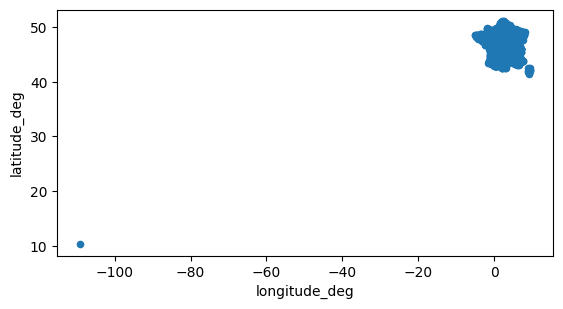

In [42]:
#se grafica
base = france.plot(color='navy', edgecolor='lavender') #no es el proyectado
infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [43]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=france.crs.to_epsg())# the coordinates were in degrees - no proyectado

<Axes: >

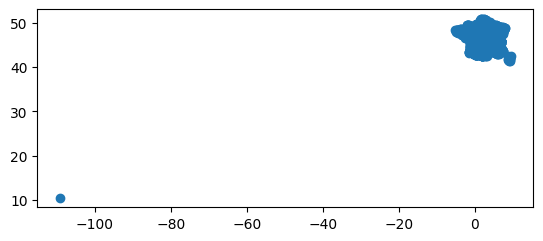

In [44]:
#se vuelve a proyectar
base = france.plot(color='navy', edgecolor='lavender')
airports.plot(ax=base)

In [45]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

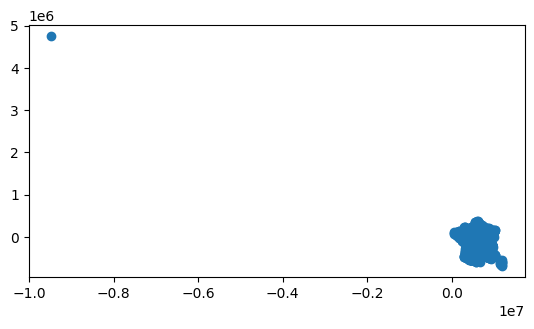

In [46]:
airports.to_crs(27561).plot()

In [47]:
# this does not: porque no es un crs
infoairports.to_crs(27561).plot()

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [48]:
airportsfrance_27561=airports.to_crs(27561)

In [49]:
#te dara la info de los aeropuertos
airportsfrance_27561['type'].value_counts()

type
small_airport     503
heliport          264
medium_airport    133
closed             73
seaplane_base      11
large_airport       8
balloonport         1
Name: count, dtype: int64

In [50]:
#renombramos la columna
airportsfrance_27561.rename(columns={'type':'aeropuertosfrance'},inplace=True)

In [51]:
from folium import LayerControl

m = airportsfrance_27561[airportsfrance_27561.aeropuertosfrance=='small_airport'].explore(color="red",name="small",show=False)
m = airportsfrance_27561[airportsfrance_27561.aeropuertosfrance=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airportsfrance_27561[airportsfrance_27561.aeropuertosfrance=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airportsfrance_27561[airportsfrance_27561.aeropuertosfrance=='balloonport'].explore(m=m, color="green",name="seaplane",show=False)
m = airportsfrance_27561[airportsfrance_27561.aeropuertosfrance=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airportsfrance_27561[airportsfrance_27561.aeropuertosfrance=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [52]:
#se guarda
airportsfrance_27561.to_file(os.path.join("maps","franceMaps_27561.gpkg"),layer='airports', driver="GPKG")

In [61]:
#EJERCICIO 6
france_Up

,geometry,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1
0,"MULTIPOLYGON (((99479.467 32305.919, 99482.212...",79,FRA,France,1,Alsace,Région,Region,NaN,Alsacia|Elsaß


<Axes: >

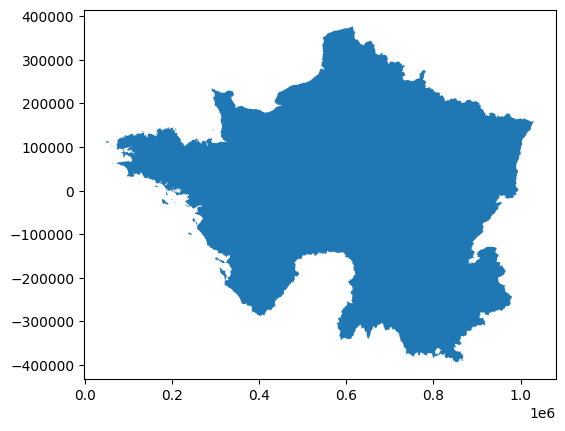

In [62]:
france_Up.plot()

In [63]:
france_Up.convex_hull

0    POLYGON ((854112.301 -394003.236, 850556.633 -...
dtype: geometry

<Axes: >

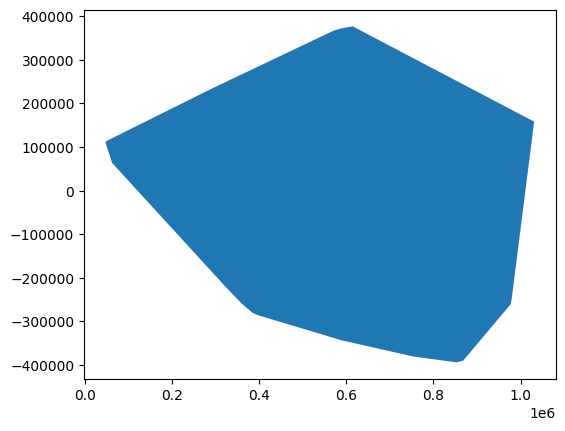

In [64]:
france_Up.convex_hull.plot()

In [66]:
large_airport_france=airportsfrance_27561[airportsfrance_27561.aeropuertosfrance=='large_airport']
# several rows
large_airport_france

,name,aeropuertosfrance,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Charles de Gaulle International Airport,large_airport,49.012798,2.550000,392.0,Île-de-France,Paris,POINT (615616.663 145851.646)
1,Paris-Orly Airport,large_airport,48.723330,2.379440,291.0,Île-de-France,Paris,POINT (603158.734 113641.374)
2,Nice-Côte d'Azur Airport,large_airport,43.658401,7.215870,12.0,Provence-Alpes-Côte-d'Azur,Nice,POINT (995238.561 -437578.033)
3,Marseille Provence Airport,large_airport,43.439272,5.221424,74.0,Provence-Alpes-Côte-d'Azur,Marseille,POINT (834724.877 -470354.012)
4,EuroAirport Basel-Mulhouse-Freiburg Airport,large_airport,47.590000,7.529167,885.0,Grand Est,Bâle/Mulhouse,POINT (990422.472 1054.773)
5,Toulouse-Blagnac Airport,large_airport,43.629101,1.363820,499.0,Occitanie,Toulouse/Blagnac,POINT (521108.959 -453137.898)
6,Lyon Saint-Exupéry Airport,large_airport,45.725556,5.081111,821.0,Auvergne-Rhône-Alpes,Lyon,POINT (814031.171 -215997.002)
7,Bordeaux-Mérignac Airport,large_airport,44.828300,-0.715556,162.0,Nouvelle-Aquitaine,Bordeaux/Mérignac,POINT (357949.083 -314959.795)


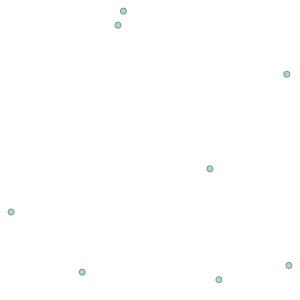

In [67]:
#se deben combinar todos
large_airport_france.unary_union

In [68]:
gpd.GeoSeries(large_airport_france.unary_union)

0    MULTIPOINT (357949.083 -314959.795, 521108.959...
dtype: geometry

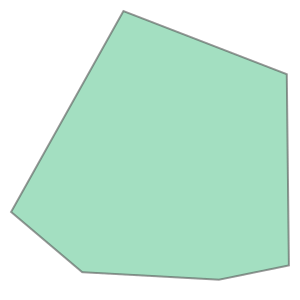

In [69]:
large_airport_france.unary_union.convex_hull

In [70]:
type(large_airport_france.unary_union.convex_hull)

shapely.geometry.polygon.Polygon

In [72]:
large_airport_france.union.convex_hull.plot()

AttributeError: 'function' object has no attribute 'convex_hull'

<Axes: >

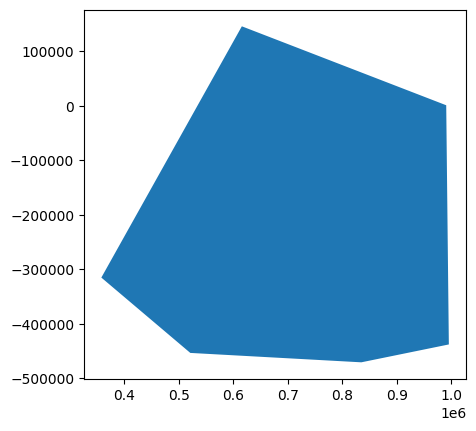

In [73]:
# but it will for a series
gpd.GeoSeries(large_airport_france.unary_union.convex_hull).plot()

In [74]:
# as gdf
aeropuertosGrandes_hull=gpd.GeoSeries(large_airport_france.unary_union.convex_hull).to_frame()
aeropuertosGrandes_hull

,0
0,"POLYGON ((834724.877 -470354.012, 521108.959 -..."


In [78]:
#next steps
aeropuertosGrandes_hull.rename(columns={0:'geometry'},inplace=True)
aeropuertosGrandes_hull['name']='aeropuertosGrandes hull' # optional
aeropuertosGrandes_hull=aeropuertosGrandes_hull.set_geometry('geometry')
aeropuertosGrandes_hull.crs="EPSG:27561"
# verifying:
aeropuertosGrandes_hull.crs

<Projected CRS: EPSG:27561>
Name: NTF (Paris) / Lambert Nord France
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France mainland onshore north of 53.5 grads North (48°09'N).
- bounds: (-4.87, 48.14, 8.23, 51.14)
Coordinate Operation:
- name: Lambert Nord France
- method: Lambert Conic Conformal (1SP)
Datum: Nouvelle Triangulation Francaise (Paris)
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Paris

<Axes: >

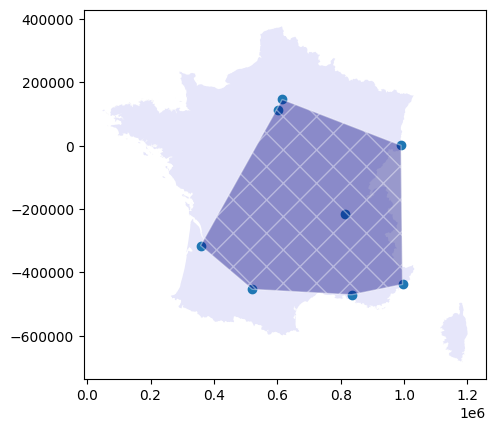

In [81]:
base=france_27561.plot(facecolor='lavender')
large_airport_france.plot(ax=base)
aeropuertosGrandes_hull.plot(ax=base,facecolor='navy',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [82]:
aeropuertosGrandes_hull.explore()

In [86]:
#EJERCICIO 7
#COMO ESTA VACIO TODOS SON VALIDOS
france_departamento_27561[~france_departamento_27561.is_valid]

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
